# OBJECT DETECTION

## NAMA : FARHAN DWI PRAMANA
## NIM : 2141720125
## ABSEN : 11

### Metode :
  1. Template Matching
  2. Edge Detection
  3. Corner Detection
  4. Grid Detection
  5. Contour Detection

In [1]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Akses Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### TEMPLATE MATCHING

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

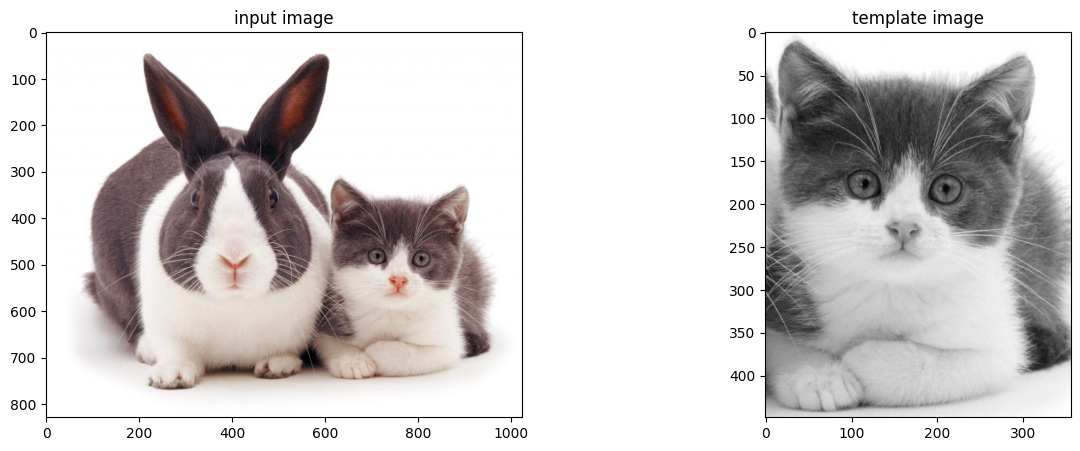

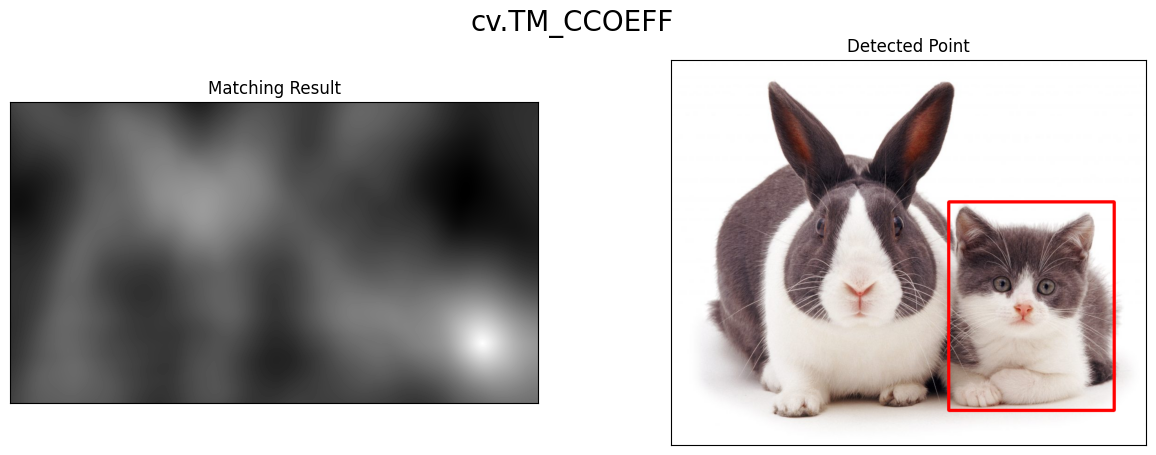

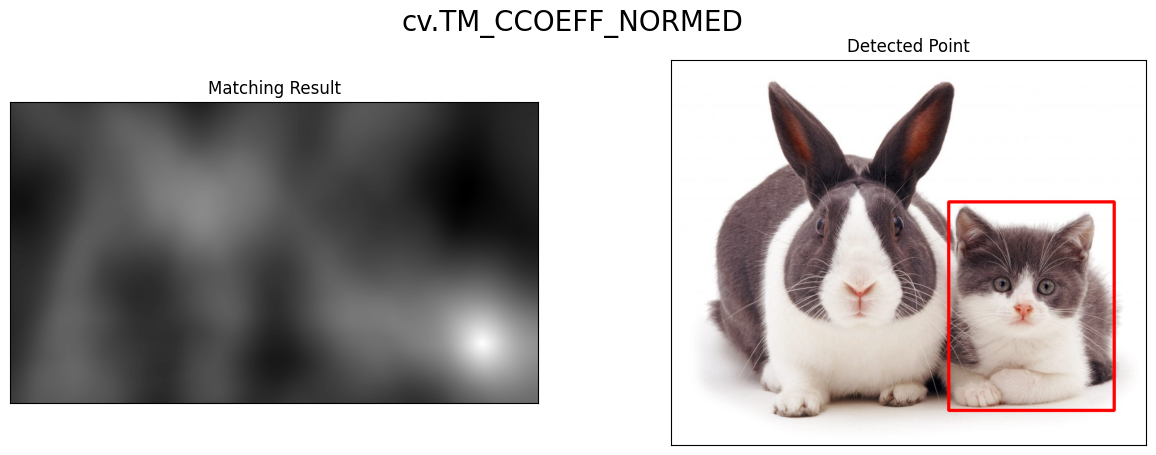

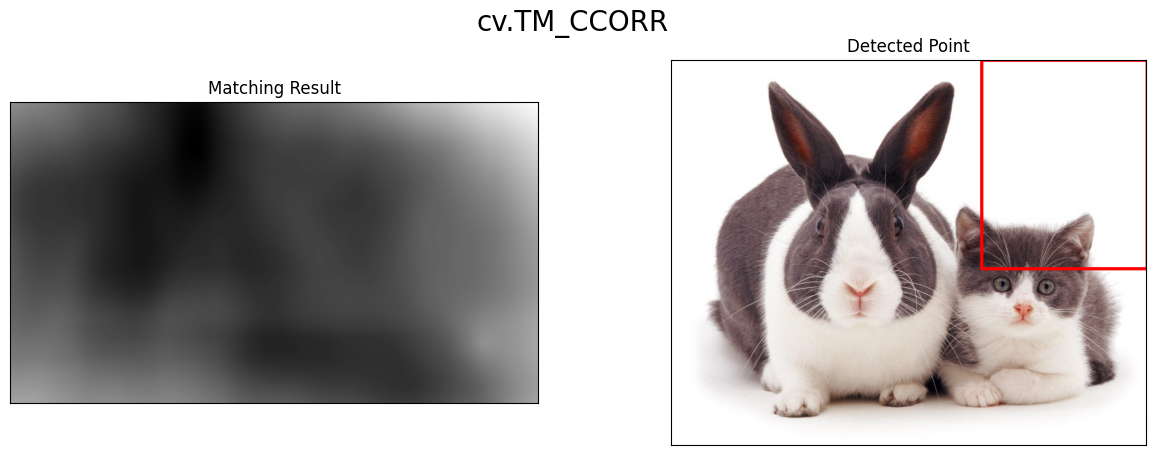

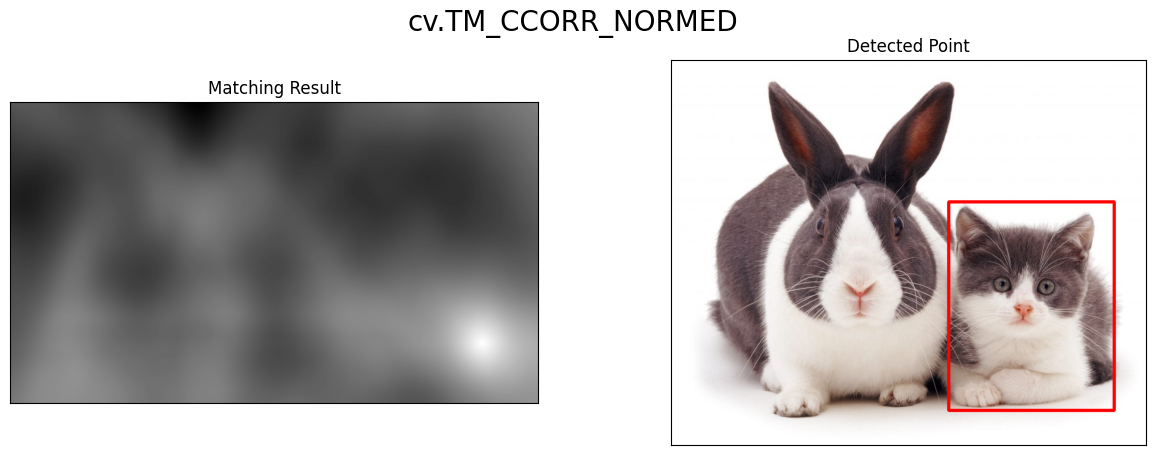

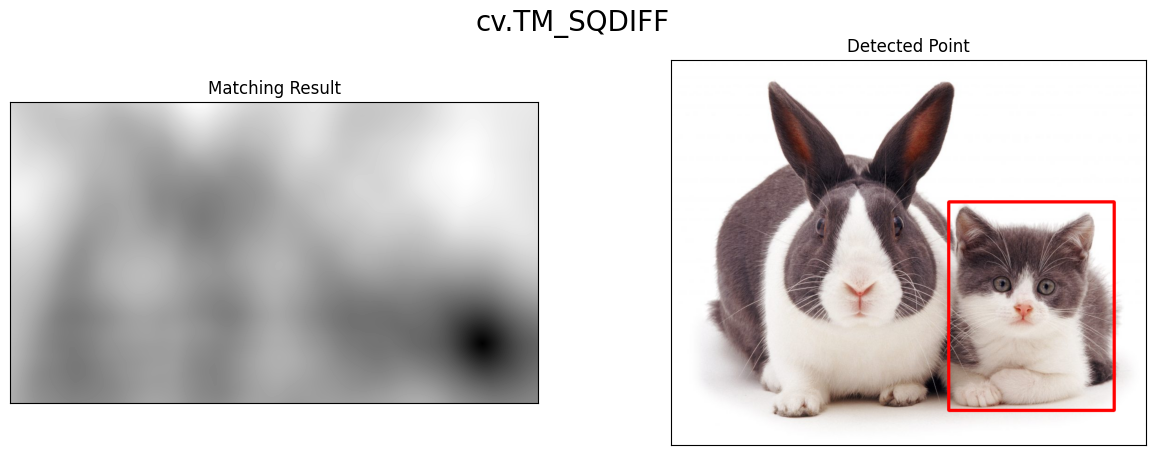

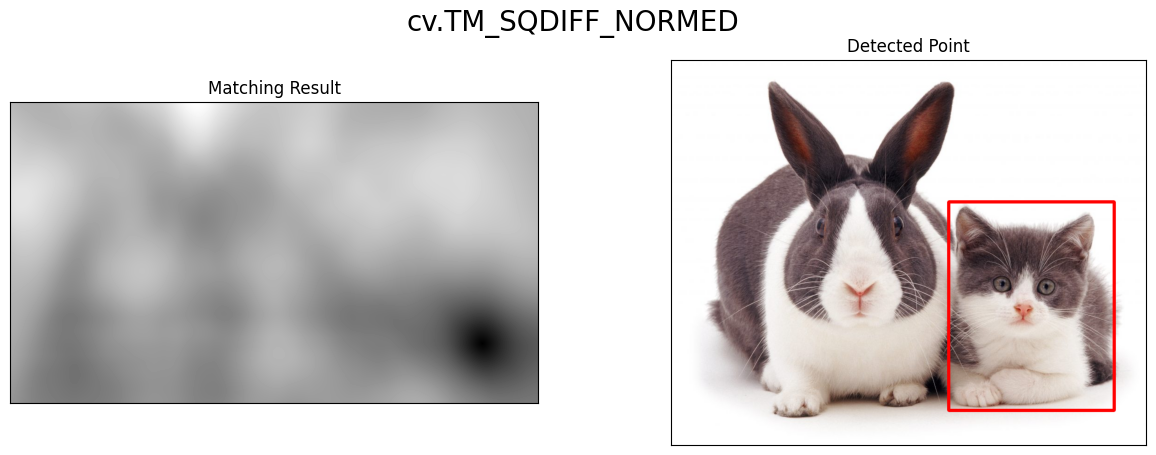

In [8]:
# load citra input
img = cv.imread('/content/drive/MyDrive/img/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/img/cat2_templatejpg.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255), 5)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:

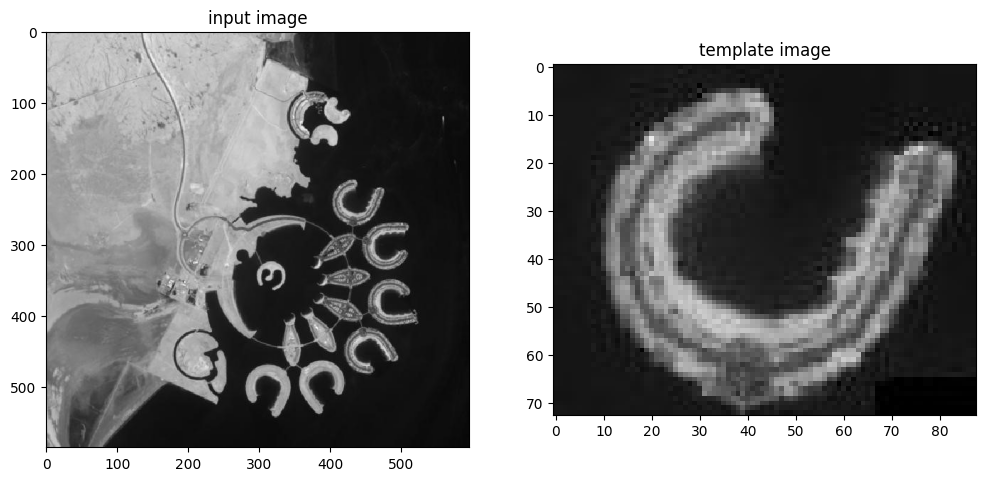

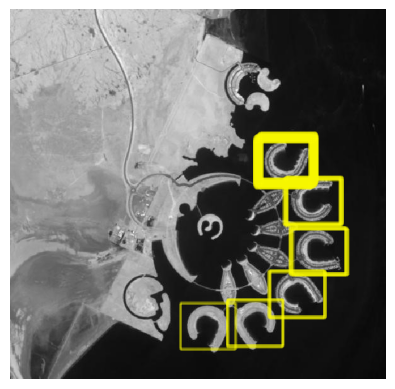

In [111]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/img/bahrain.jpg', 0)
template = cv.imread('/content/drive/MyDrive/img/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.45
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='yellow', facecolor='none', linewidth=0.15)
    ax.add_patch(rect)

plt.show()

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

#### SOBEL EDGE DETECTION

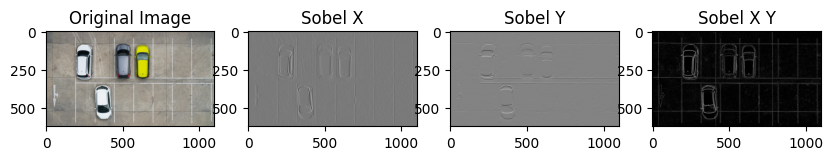

In [31]:
import cv2
import matplotlib.pyplot as plt

# Read the original image
img = cv2.imread('/content/drive/MyDrive/img/car-park.jpg')

img_gray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv2.cvtColor(img, cv.COLOR_BGR2RGB)

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)  # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)  # Sobel Edge Detection on the Y axis
sobel_combined = cv.magnitude(sobelx, sobely)  # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images using matplotlib
plt.figure(figsize=(10, 6))
plt.subplot(141), plt.imshow(img_car, cmap='gray'), plt.title('Original Image')
plt.subplot(142), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(143), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(144), plt.imshow(sobel_combined, cmap='gray'), plt.title('Sobel X Y')

plt.show()


#### CANNY EDGE DETECTION

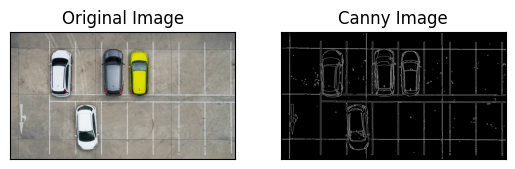

In [38]:
import cv2
# Read the original image
img = cv2.imread('/content/drive/MyDrive/img/car-park.jpg')

img_gray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv2.cvtColor(img, cv.COLOR_BGR2RGB)

canny = cv.Canny(img_gray,100,200)
plt.subplot(121),plt.imshow(img_car,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny,cmap = 'gray')
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.show()

#### LAPLACIAN EDGE DETECTION

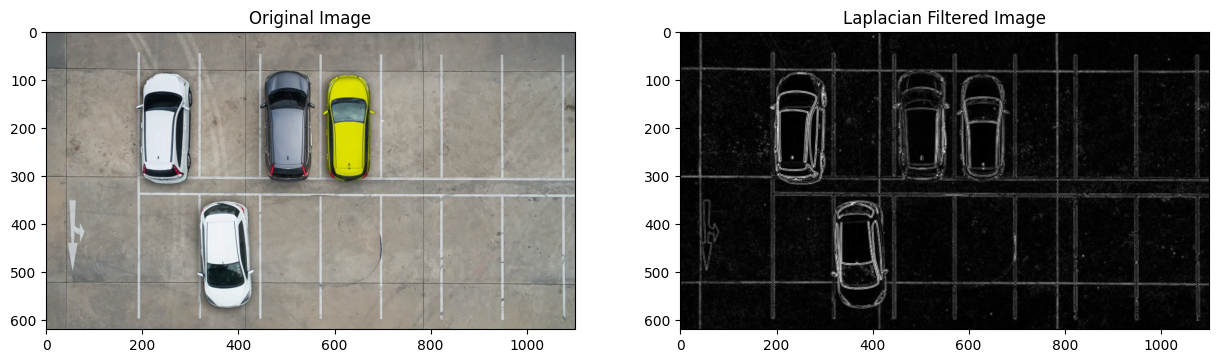

In [39]:
import cv2
# Read the original image
img = cv2.imread('/content/drive/MyDrive/img/car-park.jpg')

img_gray = cv2.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv2.cvtColor(img, cv.COLOR_BGR2RGB)

# Reduce noise in image
img = cv2.GaussianBlur(img_gray,(3,3),0)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(img, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
# Plot outputs
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(img_car)
ax2.title.set_text('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

#### HARRIS CORNER DETECTION

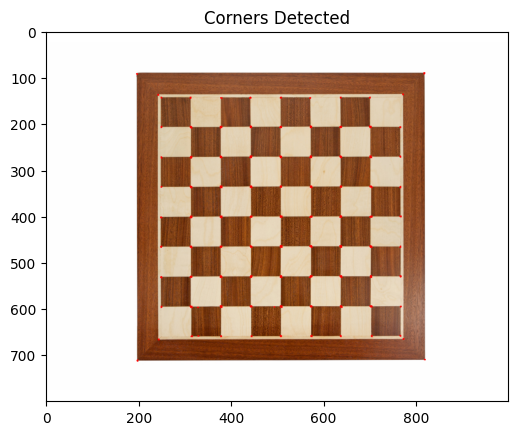

In [42]:
filename = '/content/drive/MyDrive/img/chess-board.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners, not important
dst = cv.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the image using matplotlib
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Corners Detected')
plt.show()


#### SHI_THOMASI DETECTION

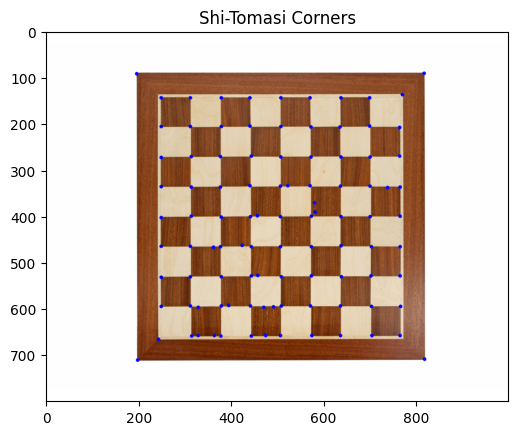

In [50]:
# Load the image in grayscale
img = cv.imread('/content/drive/MyDrive/img/chess-board.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Define Shi-Tomasi corner detection parameters
max_corners = 100
quality_level = 0.01
min_distance = 10

# Detect corners using Shi-Tomasi
corners = cv.goodFeaturesToTrack(gray, max_corners,
                  quality_level, min_distance)

# Convert corners to integers
corners = np.int0(corners)

# Draw circles at detected corner locations
for corner in corners:
    x, y = corner.ravel()
    cv.circle(img, (x, y), 4, 255, -1)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corners")
plt.show()

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:

Number of Hough lines: 33


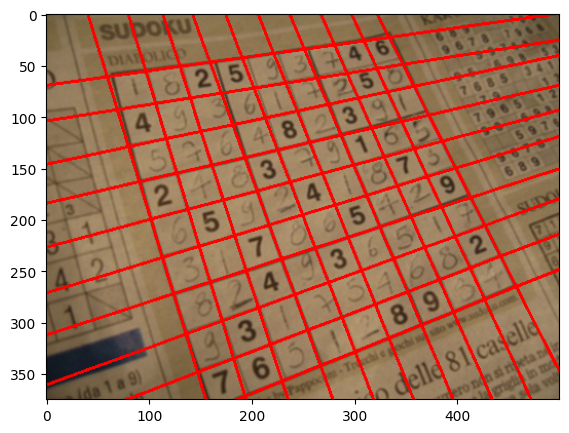

In [71]:
input_img = cv.imread('/content/drive/MyDrive/img/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8)
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8)
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('Number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(10,5))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

Number of Contours found = 217


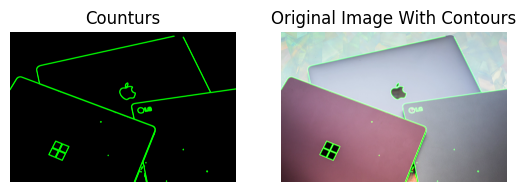

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a simple image with 3 black squares
image = cv2.imread('/content/drive/MyDrive/img/laptop.jpg')
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Convert BGR image to RGB for displaying with plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Number of Contours found =", len(contours))

# Create a blank image for drawing contours
contour_img = np.zeros_like(image)

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 15)

# Dilate the contour lines for enlargement
kernel = np.ones((5, 5), np.uint8)
contour_img_dilated = cv2.dilate(contour_img, kernel, iterations=1)

# Apply the enlarged contours to the original image
result_image = cv2.addWeighted(image, 1, contour_img_dilated, 1, 0)

# Display the original image with enlarged contours
plt.subplot(121), plt.imshow(cv2.cvtColor(contour_img_dilated, cv2.COLOR_BGR2RGB)), plt.title('Counturs')
plt.axis('off')

# Display the image with enlarged contours
plt.subplot(122), plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image With Contours')
plt.axis('off')

plt.show()


### PENGAYAAN MATERI KTP

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

2. Muat 2 library berikut sebagai tahapan persiapan

In [117]:
import cv2
import os

# load data
img_ktp = cv.imread('/content/drive/MyDrive/img/KTP/ktp3.png')

# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(img_ktp, (5, 5), 0.5)

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori dataset tersebut

168.0 (300, 493)


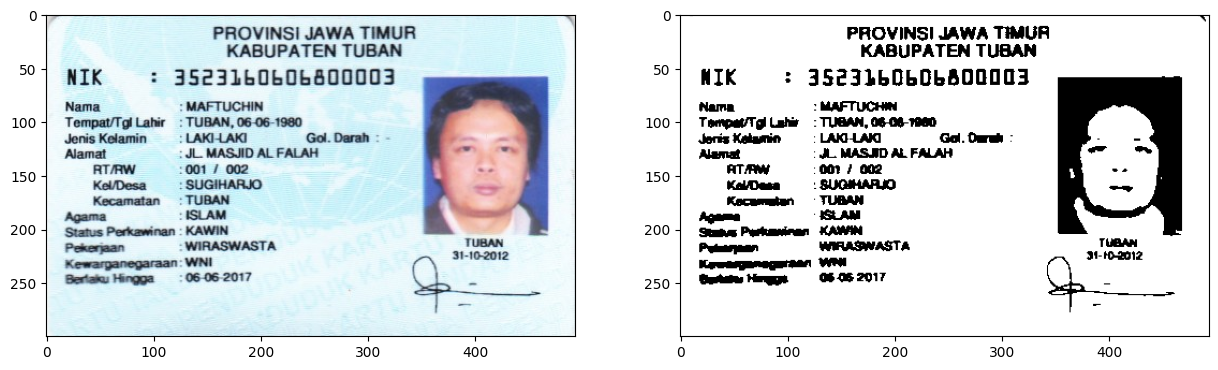

In [118]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

4. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.

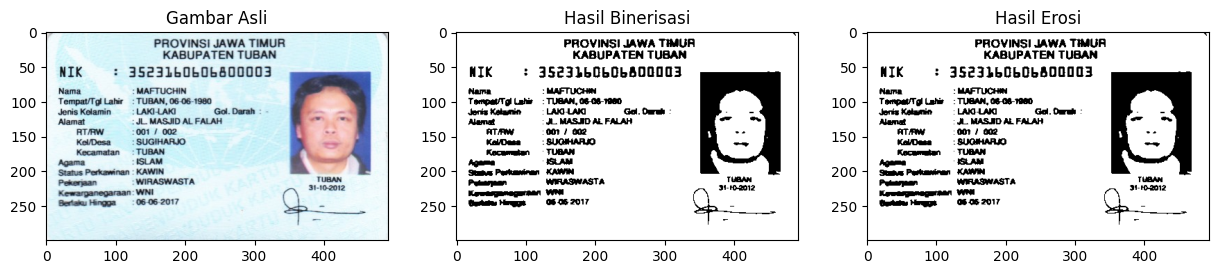

In [119]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(img_ktp, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

5. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek. Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik (karena hasil akuisisi setiap citra dapat berbeda).

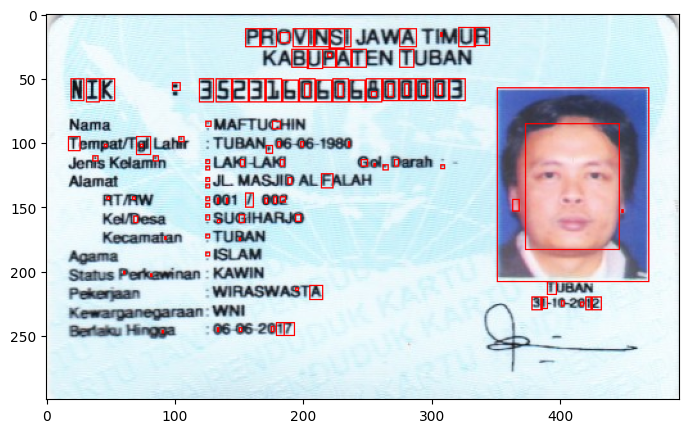

In [121]:
blurred = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))

# TUGAS PRAKTIKUM

Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:
* Kelompok 1 – KTP Riyanto Sleman
* Kelompok 2 – KTP Galang Raka Bengkulu
* Kelompok 3 – KTP Arief Wijaya Cimahi
* Kelompok 4 – KTP Edo Nias
* Kelompok 5 – KTP Widiarso Bekasi
* Kelompok 6 – KTP Abdurrauf Soppeng